In [1]:
import cv2
import numpy as np
from PIL import Image
from IPython.display import display
import pytesseract

In [2]:
src = cv2.imread('voda.jpg', cv2.IMREAD_COLOR)
src = src[200:320, 40:560] # 40,200 520x120 # y1:y2, x1,x2

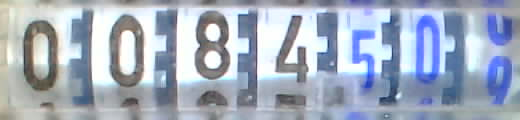

In [3]:
display(Image.fromarray(src))

In [4]:
blue_channel = src[:,:,0] 

In [5]:
blurred = cv2.GaussianBlur(blue_channel, (5, 5), 0)

In [6]:
thresh = cv2.adaptiveThreshold(blurred, 255,cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY_INV, 31, 15)

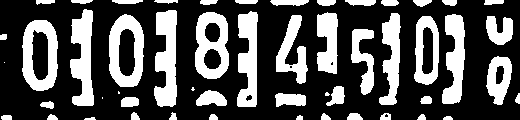

In [7]:
display(Image.fromarray(thresh))

In [8]:
kernel = np.ones((3,3),np.uint8)
closing = cv2.morphologyEx(thresh, cv2.MORPH_CLOSE, kernel, iterations=2)

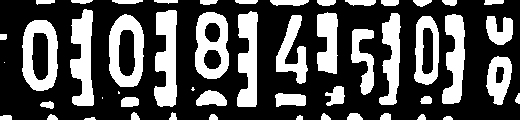

In [9]:
display(Image.fromarray(closing))

In [10]:
numbers = [] # 60x100
numbers.append(closing[5:120, 0:60])
numbers.append(closing[5:120, 95:155])
numbers.append(closing[5:120, 185:245])
numbers.append(closing[5:120, 260:320])
numbers.append(closing[5:120, 330:390])
numbers.append(closing[5:120, 395:455])
numbers.append(closing[5:120, 480:520])

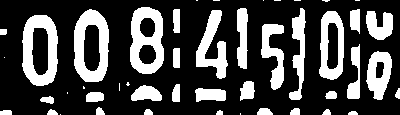

In [11]:
numpy_horizontal_concat = np.concatenate(numbers, axis=1)
display(Image.fromarray(numpy_horizontal_concat))

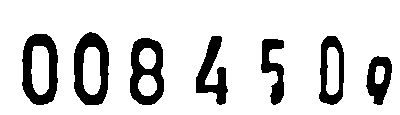

In [12]:
digits = []
for number in numbers:
    (contours, hierarchy) = cv2.findContours(image=number, mode=cv2.RETR_TREE, method=cv2.CHAIN_APPROX_NONE)
    image_copy = number.copy()
    
    contours = list(contours)
    
    m,i = max((cv2.contourArea(v),i) for i,v in enumerate(contours))
    
    _ = cv2.drawContours(image=image_copy, contours=contours, contourIdx=i, color=(255,255,255), thickness=cv2.FILLED)
    _,y,_,h = cv2.boundingRect(contours[i])
    shift = (number.shape[0]  - (y + h)) - 10
    
    del contours[i]
    _ = cv2.drawContours(image=image_copy, contours=contours, contourIdx=-1, color=(0,0,0), thickness=cv2.FILLED)
    
    img = cv2.bitwise_not(image_copy)
    img = np.roll(img, shift, axis=0)
    digits.append(img)
    
numpy_horizontal_concat = np.concatenate(digits, axis=1)
display(Image.fromarray(numpy_horizontal_concat))

In [13]:
word = pytesseract.image_to_string(numpy_horizontal_concat, config='--psm 13')
print(word)

00845 De

